<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


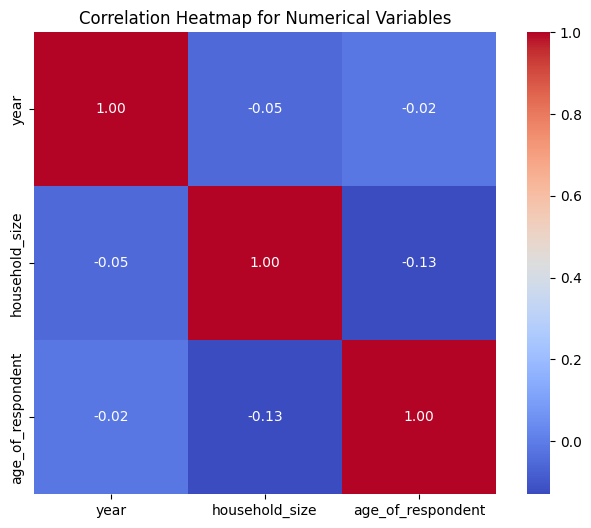

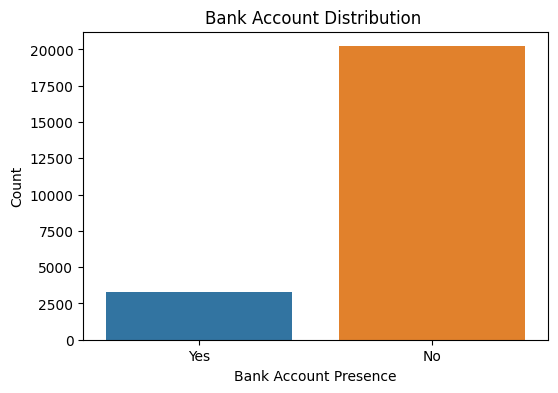

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Accuracy: 0.8599362380446334
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.93      0.92      4063
         Yes       0.48      0.40      0.44       642

    accuracy                           0.86      4705
   macro avg       0.70      0.67      0.68      4705
weighted avg       0.85      0.86      0.85      4705



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Accuracy: 0.8835281615302869
Random Forest Accuracy: 0.8599362380446334
Gradient Boosting Accuracy: 0.8909670563230606

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      4063
         Yes       0.67      0.29      0.41       642

    accuracy                           0.88      4705
   macro avg       0.78      0.63      0.67      4705
weighted avg       0.87      0.88      0.86      4705


Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.93      0.92      4063
         Yes       0.48      0.40      0.44       642

    accuracy                           0.86      4705
   macro avg       0.70      0.67      0.68      4705
weighted avg       0.85      0.86      0.85      4705


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.90     

No     9427
Yes     659
Name: predicted_bank_account, dtype: int64

In [3]:
# KaggleX Final Project



## Financial Inclusion in Africa


### Background

#Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.
#he objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.


## Load Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load data

train_df = pd.read_csv("https://raw.githubusercontent.com/fmiriam/Financial-inclusion---account-opening/main/Train.csv")
test_df =pd.read_csv("https://raw.githubusercontent.com/fmiriam/Financial-inclusion---account-opening/main/Test.csv")

# Check the top rows of the dataset
train_df.head()

# Check the bottom rows of the dataset
train_df.head()

# Check data size
train_df.shape

#The training set contains 23524 records and 13 columns

train_df.info()

### Exploratory data analysis

#### Data overview

# Count of Bank Accounts by Country
country_counts = train_df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig1 = px.bar(country_counts, x='Country', y='Count', title='Count of Bank Accounts by Country')
fig1.show()

#Rwanda has the highest record of account holders and Uganda the lowest number as per the dataset.

Rwanda: 8735
Tanzania: 6620
Kenya: 6068
Uganda:2101

# Count of Bank Accounts by Year
year_counts = train_df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig2 = px.bar(year_counts, x='Year', y='Count', title='Count of Bank Accounts by Year')
fig2.show()

#### Demographic Analysis

# Age Distribution (Histogram)
fig_age = px.histogram(train_df, x='age_of_respondent', title='Age Distribution')
fig_age.show()

# Gender Distribution (Pie Chart)
gender_counts = train_df['gender_of_respondent'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig_gender = px.pie(gender_counts, names='Gender', values='Count', title='Gender Distribution')
fig_gender.show()

# Marital Status Distribution (Bar Chart)
marital_status_counts = train_df['marital_status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital Status', 'Count']

fig_marital_status = px.bar(marital_status_counts, x='Marital Status', y='Count',
                            title='Marital Status Distribution')
fig_marital_status.show()

# Education Level Distribution (Bar Chart)
education_counts = train_df['education_level'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Count']

fig_education = px.bar(education_counts, x='Education Level', y='Count',
                       title='Education Level Distribution')
fig_education.show()

# Job Type Distribution (Bar Chart)
job_type_counts = train_df['job_type'].value_counts().reset_index()
job_type_counts.columns = ['Job Type', 'Count']

fig_job_type = px.bar(job_type_counts, x='Job Type', y='Count',
                      title='Job Type Distribution')
fig_job_type.show()

#### Household Analysis

# Household Size Distribution (Histogram)
fig_household_size = px.histogram(train_df, x='household_size', title='Household Size Distribution')
fig_household_size.show()


# Relationship with Head of Household Distribution
relationship_counts = train_df['relationship_with_head'].value_counts().reset_index()
relationship_counts.columns = ['Relationship Type', 'Count']

fig_relationship = px.bar(relationship_counts, x='Relationship Type', y='Count',
                           title='Relationship with Head of Household Distribution')
fig_relationship.show()

#### Financial Inclusion Factors


# Cellphone Access vs. Bank Accounts (Stacked Bar Chart)
cellphone_bank_counts = train_df.groupby(['cellphone_access', 'bank_account']).size().reset_index(name='Count')

fig_cellphone_access = px.bar(cellphone_bank_counts,
                              x='cellphone_access',
                              y='Count',
                              color='bank_account',
                              barmode='stack',
                              labels={'cellphone_access': 'Cellphone Access', 'bank_account': 'Bank Account'},
                              title='Cellphone Access vs. Bank Accounts')
fig_cellphone_access.show()

# Location Type vs. Bank Accounts (Stacked Bar Chart)
location_bank_counts = train_df.groupby(['location_type', 'bank_account']).size().reset_index(name='Count')

fig_location_type = px.bar(location_bank_counts,
                           x='location_type',
                           y='Count',
                           color='bank_account',
                           barmode='stack',
                           labels={'location_type': 'Location Type', 'bank_account': 'Bank Account'},
                           title='Location Type vs. Bank Accounts')
fig_location_type.show()

#### Trends and patterns

# Age vs. Bank Accounts (Box Plot)
fig_age_vs_bank_account = px.box(train_df, x='bank_account', y='age_of_respondent',
                                  labels={'bank_account': 'Bank Account Presence', 'age_of_respondent': 'Age'},
                                  title='Age vs. Bank Accounts')
fig_age_vs_bank_account.show()

# Yearly Trends in Bank Accounts (Line Chart)
yearly_trends = train_df.groupby('year')['bank_account'].value_counts().reset_index(name='Count')

fig_yearly_trends = px.line(yearly_trends, x='year', y='Count', color='bank_account',
                            labels={'year': 'Year', 'Count': 'Count of Bank Accounts'},
                            title='Yearly Trends in Bank Accounts')
fig_yearly_trends.show()

# Selecting numerical variables
numerical_vars = ['year', 'household_size', 'age_of_respondent']

# Creating a correlation matrix
correlation_matrix = train_df[numerical_vars].corr()

# Creating a correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

# Bank Account Distribution (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='bank_account', data=train_df)
plt.xlabel('Bank Account Presence')
plt.ylabel('Count')
plt.title('Bank Account Distribution ')
plt.show()

# Bank Account Distribution (Pie Chart)
bank_account_counts = train_df['bank_account'].value_counts().reset_index()
bank_account_counts.columns = ['Bank Account', 'Count']

fig_bank_account_pie = px.pie(bank_account_counts, names='Bank Account', values='Count',
                               title='Bank Account Distribution ')
fig_bank_account_pie.show()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Selecting features and target variable
features = ['country', 'year', 'location_type', 'cellphone_access', 'household_size',
            'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
            'marital_status', 'education_level', 'job_type']

target = 'bank_account'

# Splitting data into features and target variable
X = train_df[features]
y = train_df[target]

# One-hot encoding categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))
encoded_feature_names = encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenating one-hot encoded features with numerical features
X_final = pd.concat([X_encoded_df, X.select_dtypes(include=['int64'])], axis=1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'data'
# Replace 'data' with the actual variable containing your dataset

# Selecting features and target variable
features = ['country', 'year', 'location_type', 'cellphone_access', 'household_size',
            'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
            'marital_status', 'education_level', 'job_type']

target = 'bank_account'

# Splitting data into features and target variable
X = train_df[features]
y = train_df[target]

# One-hot encoding categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))
encoded_feature_names = encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenating one-hot encoded features with numerical features
X_final = pd.concat([X_encoded_df, X.select_dtypes(include=['int64'])], axis=1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Training and evaluating Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Training and evaluating Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Training and evaluating Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Print accuracies
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Print classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))



# Assuming your test data is stored in a DataFrame named 'test_data'
# Replace 'test_data' with the actual variable containing your test data

# Selecting features for the test data
test_features = ['country', 'year', 'location_type', 'cellphone_access', 'household_size',
                 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
                 'marital_status', 'education_level', 'job_type']

# Extracting test features
X_test_data = test_df[test_features]

# One-hot encoding categorical features for the test data
X_test_encoded = encoder.transform(X_test_data.select_dtypes(include=['object']))
encoded_test_feature_names = encoder.get_feature_names_out(X_test_data.select_dtypes(include=['object']).columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_test_feature_names)

# Concatenating one-hot encoded features with numerical features for the test data
X_test_final = pd.concat([X_test_encoded_df, X_test_data.select_dtypes(include=['int64'])], axis=1)

# Making predictions using the trained Gradient Boosting Classifier
gb_predictions = gb_clf.predict(X_test_final)

# Adding predictions to the test data
test_df['predicted_bank_account'] = gb_predictions

# Displaying the test data with predictions
print(test_df[['uniqueid', 'predicted_bank_account']])


test_df.predicted_bank_account.value_counts()

